In [293]:
import pyforest

In [294]:
data = pd.read_csv('house.csv', encoding='latin-1')

In [295]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [297]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'prices')

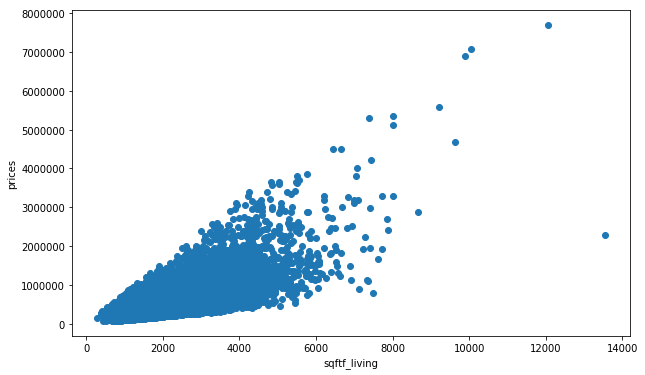

In [298]:
#-- TAKE NOTE OF THE FIGURE METHOD
plt.figure(figsize=(10,6))
plt.scatter(data['sqft_living'],data['price'])
plt.xlabel('sqftf_living')
plt.ylabel('prices')

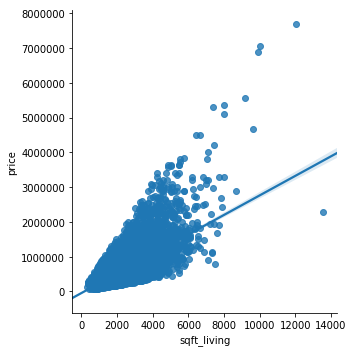

In [299]:
sns.lmplot('sqft_living','price',data=data) 

In [300]:
# plt.figure(figsize=(10,6))
# plt.scatter(data['bedrooms'],data['price'])
#sns.lmplot('bedrooms','price',data=data)

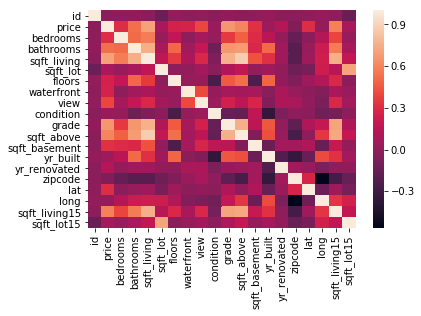

In [301]:
sns.heatmap(data.corr())

In [302]:
features = data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [303]:
label = data[['price']]

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [305]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [306]:
print(features_train.shape)
print(features_test.shape)

(19451, 18)
(2162, 18)


In [307]:
model = LinearRegression()

In [308]:
model.fit(features_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [309]:
label_test.iloc[9]

price    865000
Name: 4244, dtype: int64

In [310]:
model.predict(features_test)[9]

array([884376.42653452])

In [311]:
test_predict = pd.DataFrame({
    'bedrooms': 5,
    'bathrooms': 2,
    'sqft_living': 1000,
    'sqft_lot': 20456, 
    'floors': 2, 
    'sqft_above': 1480,
    'sqft_lot15':6005,
    'yr_built': 1965,
    'condition': 4, 
    'zipcode': 98064,
    'waterfront': 0, 
    'view': 0, 
    'grade': 8,   
    'yr_renovated': 1987, 
    'sqft_basement': 450,
    'lat': 23.5677, 
    'long': -23.456, 
    'sqft_living15': 1200, 
    
}, index=[0])

In [312]:
model.predict(test_predict)

array([[1.50483874e+09]])

In [313]:
label_train.iloc[0]

price    400000
Name: 18051, dtype: int64

In [314]:
#-- SERIOUS UNDER-FITTING
model.predict(features_train)[0]

array([572556.42068782])

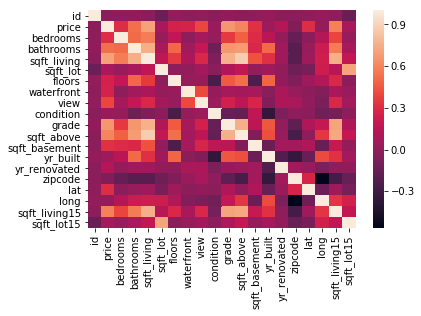

In [315]:
sns.heatmap(data.corr())

In [387]:
features_2 = data[['bathrooms', 'sqft_living', 'sqft_living15', 'grade','sqft_above', 'bedrooms', 'floors', 'view']]

In [388]:
label_2 = data[['price']]

In [389]:
features_2_train, features_2_test, label_2_train, label_2_test = train_test_split(features_2, label_2, test_size=0.1)

In [390]:
model_2 = LinearRegression()

In [391]:
 model_2.fit(features_2_train,label_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [392]:
label_2_test.iloc[678]

price    235500
Name: 13920, dtype: int64

In [393]:
model_2.predict(features_2_test)[678]

array([363656.01049644])

In [394]:
features_2_train.head()

,bathrooms,sqft_living,sqft_living15,grade,sqft_above,bedrooms,floors,view
21095,2.50,1889,1990,7,1889,4,2.0,0
11485,2.75,2600,2550,8,1300,4,1.0,0
8951,1.00,1100,1170,7,900,3,1.0,0
18560,2.25,1100,1230,8,900,2,2.0,0
18661,1.50,2500,1300,7,1450,3,1.5,2


In [395]:
test_2_predict = pd.DataFrame({
    'bathrooms': 2,
    'sqft_living': 1800,
    'sqft_living15': 1200,
    'grade': 8, 
    'sqft_above': 1480,
    'bedrooms': 5,  
    'floor': 2,
    'view': 0
}, index=[0])

In [396]:
model_2.predict(test_2_predict)

array([[444344.03237845]])

In [397]:
from sklearn.metrics import mean_squared_error

In [398]:
root_mean_sqrt_error_2 = mean_squared_error(label_2_test,model_2.predict(features_2_test))

In [399]:
np.sqrt(root_mean_sqrt_error_2)

231691.15440826298

In [400]:
#-- RMSE FOR FIRST MODEL
#root_mean_sqrt_error_1 = mean_squared_error(label_test,model.predict(features_test))
#np.sqrt(root_mean_sqrt_error_1)